In [ ]:
import time

import numpy as np
import pandas as pd
import ga

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
    Epoch
    Mutation Rate
"""
start_time = time.time()
sol_per_pop = 200
num_parents_mating = 100
num_generations = 20
mutation_rate = 0.1
# Creating the initial population.
population = ga.createPop(sol_per_pop)
pop_size = population.shape
best_outputs = []
res = pd.DataFrame()
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.'

    # ================================================================
    fitness = ga.cal_pop_fitness(population)
    best_outputs.append(np.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", np.max(fitness))

    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(population,
                                    num_parents_mating)
    # Generating next generation using crossover.
    # ==============================HP=============================

    offspring_crossover = ga.crossover(parents)

    # Adding some variations to the offspring using mutation.
    # ==============================HP=============================

    # offspring_mutation = ga.mutation(offspring_crossover, mutation_rate)
    offspring_mutation = ga.mutation(population, mutation_rate)
    # Creating the new population based on the parents and offspring.
    pop_and_child = np.concatenate((offspring_mutation, offspring_crossover, parents, population))
    pop_and_child_fitness = ga.cal_pop_fitness(pop_and_child)
    # print('pop_and_child_fitness',pop_and_child_fitness)
    # get n-largest element from pop_and_child
    n_largest_index = pop_and_child_fitness.argsort()[-pop_size[0]:]
    population = pop_and_child[n_largest_index]
    (unique, counts) = np.unique(pop_and_child_fitness[n_largest_index], return_counts=True)
    value_fre_df = pd.DataFrame({unique[i]: [counts[i]] for i in range(len(unique))})
    print(value_fre_df)
    res = pd.concat([res, value_fre_df], ignore_index=True, axis=0)

Generation :  0
Best result :  0.00045433893684688776


Show Result

In [11]:
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.argmax(fitness == np.max(fitness))
best_result = population[best_match_idx]
ga.manday_chromosome(best_result, True)
res = res.fillna(0)

print(best_result.HC_time)
print(best_result.HC_resource)
for chromosome_index in range(best_result.chromosome.shape[0]):
    chromosome = best_result.chromosome[chromosome_index]
    chromosome = str(chromosome).split('-')
    shift = chromosome[-1][1]
    chromosome[-1] = ga.decode_datetime(chromosome[-1][1:])
    chromosome.append(shift)
    best_result.chromosome[chromosome_index] = '-'.join(chromosome)
# print("Best solution : ", best_result)
print("Best solution fitness : ", fitness[best_match_idx])
print("--- %s seconds ---" % (time.time() - start_time))

ValueError: can only convert an array of size 1 to a Python scalar

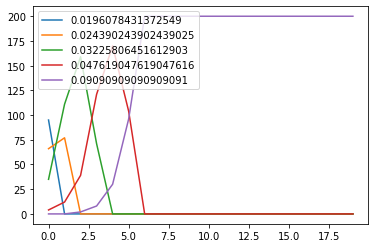

In [14]:
import matplotlib.pyplot as plt
x = range(num_generations)
for i in range(len(res.columns)):
    y = res.iloc[:,i ]
    plt.plot(x, y, label=res.columns[i])
plt.legend(loc="upper left")
plt.savefig('all10050.png')

plt.show()

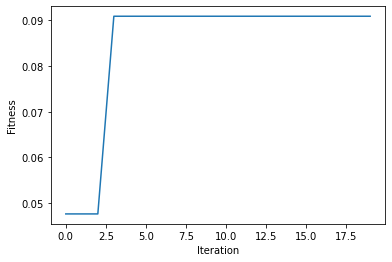

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

plt.plot(best_outputs)
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.show()
plt.savefig('iter10050.png')